In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('trans_bank.csv')
df

,Forecast_Cd,Forecast_Name,fecha,mth,dia_sem,dia_sem_txt,cierre_tj,Cant_Trx,flag_tj_vto,flag_tv_vto,flag_tm_vto,flag_tj_cierre,flag_tv_cierre,flag_tm_cierre
0,602,ACCESS BANKING,1/1/2012,201201,1,DOM,0.0,60971,NaN,NaN,NaN,NaN,NaN,NaN
1,400,ATM,1/1/2012,201201,1,DOM,0.0,14642,NaN,NaN,NaN,NaN,NaN,NaN
2,601,CONNECTION BANKING,1/1/2012,201201,1,DOM,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,201,HOLA OPERADOR,1/1/2012,201201,1,DOM,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,202,IVR,1/1/2012,201201,1,DOM,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39789,202,IVR,12/31/2022,202212,7,SAB,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0
39790,500,MOBILE,12/31/2022,202212,7,SAB,NaN,329834,0.0,0.0,0.0,0.0,0.0,0.0
39791,100,SUCURSALES,12/31/2022,202212,7,SAB,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0
39792,302,TAS,12/31/2022,202212,7,SAB,NaN,7153,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
#Fecha a datetime type object
df['fecha'] = pd.to_datetime(df['fecha'])

## NULOS Y DUPLICADOS

In [45]:
df.isnull().sum()

Forecast_Cd           0
Forecast_Name         0
fecha                 0
mth                   0
dia_sem               0
dia_sem_txt           0
cierre_tj         13704
Cant_Trx              0
flag_tj_vto       10650
flag_tv_vto       10650
flag_tm_vto       10650
flag_tj_cierre    10650
flag_tv_cierre    10650
flag_tm_cierre    10650
dtype: int64

In [46]:
df.duplicated().sum()

0

In [47]:
#duplicados por filas
df[df.duplicated()].sort_values(by=df.columns.tolist())

,Forecast_Cd,Forecast_Name,fecha,mth,dia_sem,dia_sem_txt,cierre_tj,Cant_Trx,flag_tj_vto,flag_tv_vto,flag_tm_vto,flag_tj_cierre,flag_tv_cierre,flag_tm_cierre


## Filtro por canales IVR y Mobile en conjunto

In [48]:
mobile_and_ivr_df = df[df['Forecast_Cd'].isin([202, 500])]
mobile_and_ivr_df

,Forecast_Cd,Forecast_Name,fecha,mth,dia_sem,dia_sem_txt,cierre_tj,Cant_Trx,flag_tj_vto,flag_tv_vto,flag_tm_vto,flag_tj_cierre,flag_tv_cierre,flag_tm_cierre
4,202,IVR,2012-01-01,201201,1,DOM,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,500,MOBILE,2012-01-01,201201,1,DOM,0.0,644,NaN,NaN,NaN,NaN,NaN,NaN
14,202,IVR,2012-01-02,201201,2,LUN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
15,500,MOBILE,2012-01-02,201201,2,LUN,0.0,1080,NaN,NaN,NaN,NaN,NaN,NaN
24,202,IVR,2012-01-03,201201,3,MAR,0.0,31615,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39772,500,MOBILE,2022-12-29,202212,5,JUE,NaN,423956,0.0,0.0,0.0,1.0,1.0,1.0
39780,202,IVR,2022-12-30,202212,6,VIE,NaN,10266,0.0,0.0,0.0,0.0,0.0,0.0
39781,500,MOBILE,2022-12-30,202212,6,VIE,NaN,676819,0.0,0.0,0.0,0.0,0.0,0.0
39789,202,IVR,2022-12-31,202212,7,SAB,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
mobile_and_ivr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8036 entries, 4 to 39790
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Forecast_Cd     8036 non-null   int64         
 1   Forecast_Name   8036 non-null   object        
 2   fecha           8036 non-null   datetime64[ns]
 3   mth             8036 non-null   int64         
 4   dia_sem         8036 non-null   int64         
 5   dia_sem_txt     8036 non-null   object        
 6   cierre_tj       5218 non-null   float64       
 7   Cant_Trx        8036 non-null   int64         
 8   flag_tj_vto     5906 non-null   float64       
 9   flag_tv_vto     5906 non-null   float64       
 10  flag_tm_vto     5906 non-null   float64       
 11  flag_tj_cierre  5906 non-null   float64       
 12  flag_tv_cierre  5906 non-null   float64       
 13  flag_tm_cierre  5906 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(4), object(2)
memory

In [50]:
mobile_and_ivr_df.describe()

,Forecast_Cd,fecha,mth,dia_sem,cierre_tj,Cant_Trx,flag_tj_vto,flag_tv_vto,flag_tm_vto,flag_tj_cierre,flag_tv_cierre,flag_tm_cierre
count,8036.000000,8036,8036.000000,8036.000000,5218.000000,8.036000e+03,5906.000000,5906.000000,5906.000000,5906.000000,5906.000000,5906.000000
mean,351.000000,2017-07-01 12:00:00.000000256,201706.447984,4.000000,0.327328,7.378282e+04,0.200135,0.133762,0.067050,0.134440,0.133424,0.067728
min,202.000000,2012-01-01 00:00:00,201201.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,202.000000,2014-10-01 00:00:00,201410.000000,2.000000,0.000000,8.102000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,351.000000,2017-07-01 12:00:00,201707.000000,4.000000,0.000000,1.555450e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,500.000000,2020-04-01 00:00:00,202004.000000,6.000000,0.000000,3.874825e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,500.000000,2022-12-31 00:00:00,202212.000000,7.000000,6.000000,1.646684e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,149.009272,NaN,316.286984,2.000124,0.870900,1.410127e+05,0.400135,0.340426,0.250131,0.341153,0.340061,0.251299


In [51]:
mobile_and_ivr_df.isnull().sum()

Forecast_Cd          0
Forecast_Name        0
fecha                0
mth                  0
dia_sem              0
dia_sem_txt          0
cierre_tj         2818
Cant_Trx             0
flag_tj_vto       2130
flag_tv_vto       2130
flag_tm_vto       2130
flag_tj_cierre    2130
flag_tv_cierre    2130
flag_tm_cierre    2130
dtype: int64

## Análisis univariable

In [52]:
mobile_and_ivr_df['Cant_Trx'].describe()

count    8.036000e+03
mean     7.378282e+04
std      1.410127e+05
min      0.000000e+00
25%      8.102000e+03
50%      1.555450e+04
75%      3.874825e+04
max      1.646684e+06
Name: Cant_Trx, dtype: float64

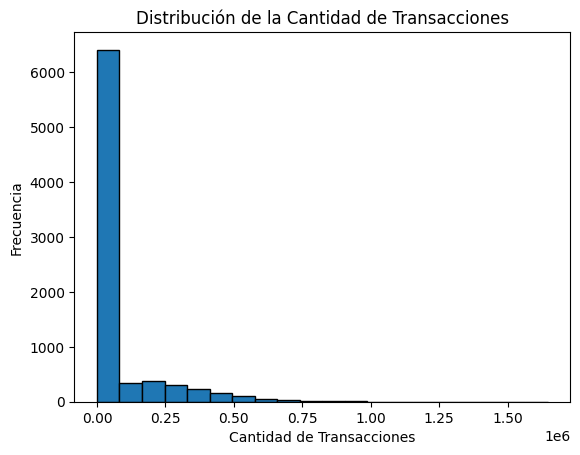

In [53]:
plt.hist(mobile_and_ivr_df['Cant_Trx'], bins=20, edgecolor='black')
plt.xlabel('Cantidad de Transacciones')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Cantidad de Transacciones')
plt.show()

In [54]:
mobile_and_ivr_df.groupby('Forecast_Name')['Cant_Trx'].sum().reset_index()

,Forecast_Name,Cant_Trx
0,IVR,41113236
1,MOBILE,551805533


C:\Users\anieto\AppData\Local\Temp\ipykernel_5072\2407443557.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Forecast_Name', y='Cant_Trx', data=mobile_and_ivr_df, palette='viridis')


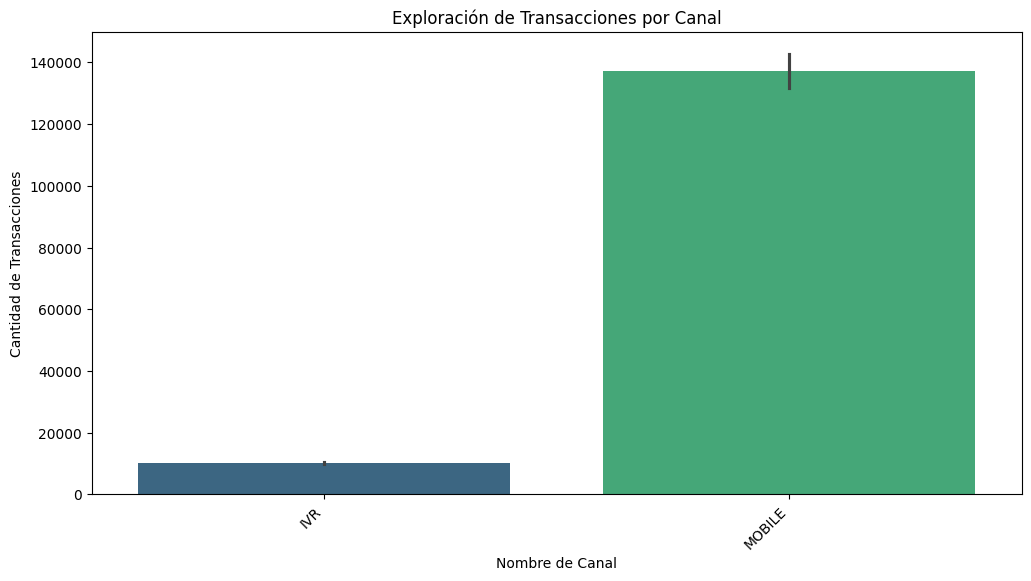

In [55]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Forecast_Name', y='Cant_Trx', data=mobile_and_ivr_df, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Nombre de Canal')
plt.ylabel('Cantidad de Transacciones')
plt.title('Exploración de Transacciones por Canal')
plt.show()

C:\Users\anieto\AppData\Local\Temp\ipykernel_5072\1606188764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mobile_and_ivr_df['año'] = mobile_and_ivr_df['fecha'].dt.year


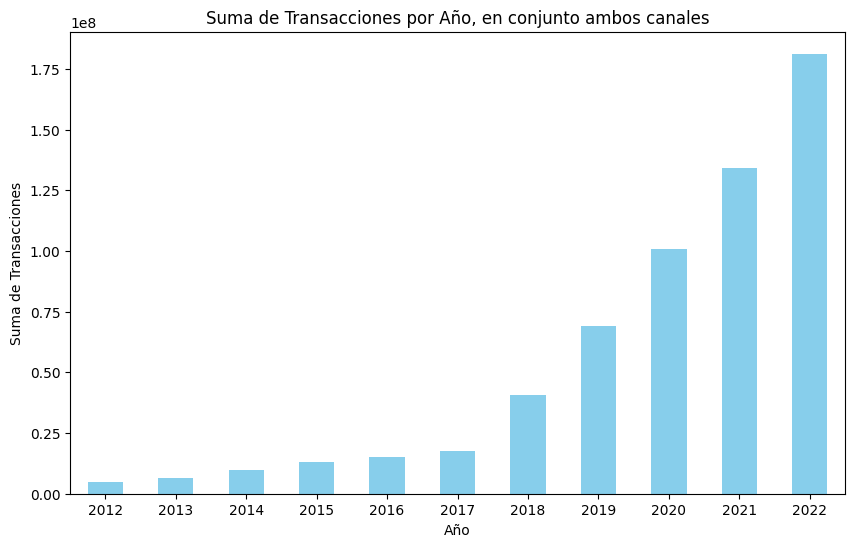

In [58]:
mobile_and_ivr_df['año'] = mobile_and_ivr_df['fecha'].dt.year

suma_por_año = mobile_and_ivr_df.groupby('año')['Cant_Trx'].sum()


plt.figure(figsize=(10, 6))
suma_por_año.plot(kind='bar', color='skyblue')
plt.xlabel('Año')
plt.ylabel('Suma de Transacciones')
plt.title('Suma de Transacciones por Año, en conjunto ambos canales')
plt.xticks(rotation=0)
plt.show()

## IVR

In [ ]:
ivr = mobile_and_ivr_df[mobile_and_ivr_df['Forecast_Name'] == 'IVR']
ivr

,Forecast_Cd,Forecast_Name,fecha,mth,dia_sem,dia_sem_txt,cierre_tj,Cant_Trx,flag_tj_vto,flag_tv_vto,flag_tm_vto,flag_tj_cierre,flag_tv_cierre,flag_tm_cierre
4,202,IVR,2012-01-01,201201,1,DOM,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
14,202,IVR,2012-01-02,201201,2,LUN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
24,202,IVR,2012-01-03,201201,3,MAR,0.0,31615,NaN,NaN,NaN,NaN,NaN,NaN
34,202,IVR,2012-01-04,201201,4,MIE,0.0,19401,NaN,NaN,NaN,NaN,NaN,NaN
44,202,IVR,2012-01-05,201201,5,JUE,2.0,19800,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39753,202,IVR,2022-12-27,202212,3,MAR,NaN,12313,0.0,0.0,0.0,0.0,0.0,0.0
39762,202,IVR,2022-12-28,202212,4,MIE,NaN,10934,0.0,0.0,0.0,0.0,0.0,0.0
39771,202,IVR,2022-12-29,202212,5,JUE,NaN,11530,0.0,0.0,0.0,1.0,1.0,1.0
39780,202,IVR,2022-12-30,202212,6,VIE,NaN,10266,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
max_trx= ivr.groupby('fecha')['Cant_Trx'].sum().idxmax()
max_trx

Timestamp('2020-04-13 00:00:00')

In [ ]:
min_trx= ivr.groupby('fecha')['Cant_Trx'].sum().idxmin()
min_trx

Timestamp('2012-01-01 00:00:00')

In [ ]:
max_trx_day = ivr[ivr['fecha'].dt.date == max_trx.date()]
max_trx_day

,Forecast_Cd,Forecast_Name,fecha,mth,dia_sem,dia_sem_txt,cierre_tj,Cant_Trx,flag_tj_vto,flag_tv_vto,flag_tm_vto,flag_tj_cierre,flag_tv_cierre,flag_tm_cierre
30082,202,IVR,2020-04-13,202004,2,LUN,NaN,49496,1.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
min_trx_day = ivr[ivr['fecha'].dt.date == min_trx.date()]
min_trx_day

,Forecast_Cd,Forecast_Name,fecha,mth,dia_sem,dia_sem_txt,cierre_tj,Cant_Trx,flag_tj_vto,flag_tv_vto,flag_tm_vto,flag_tj_cierre,flag_tv_cierre,flag_tm_cierre
4,202,IVR,2012-01-01,201201,1,DOM,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
mobile_and_ivr_df['year'] = pd.to_datetime(mobile_and_ivr_df['fecha'])

C:\Users\anieto\AppData\Local\Temp\ipykernel_5072\1529482551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mobile_and_ivr_df['year'] = pd.to_datetime(mobile_and_ivr_df['fecha'])


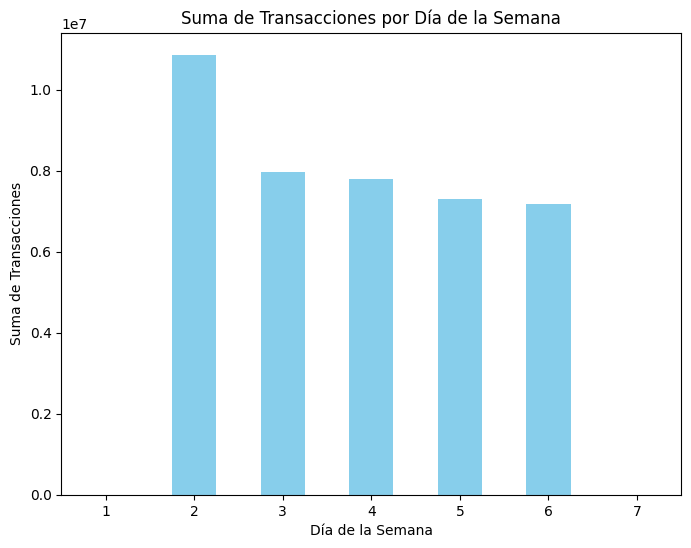

In [ ]:
#Suma por día de cantidad de transacciones
suma_por_dia = ivr.groupby('dia_sem')['Cant_Trx'].sum()

# Crear un gráfico de barras para visualizar la suma de transacciones por día de la semana
plt.figure(figsize=(8, 6))
suma_por_dia.plot(kind='bar', color='skyblue')
plt.xlabel('Día de la Semana')
plt.ylabel('Suma de Transacciones')
plt.title('Suma de Transacciones por Día de la Semana')
plt.xticks(rotation=0)  # Para rotar los nombres de los días si es necesario
plt.show()

In [ ]:
# ivr['fecha'] = pd.to_datetime(ivr['fecha'])

# Utilizar .loc para asignar el año a la nueva columna 'año'
ivr.loc[:, 'año'] = ivr['fecha'].dt.year

suma_por_año = ivr.groupby('año')['Cant_Trx'].sum()

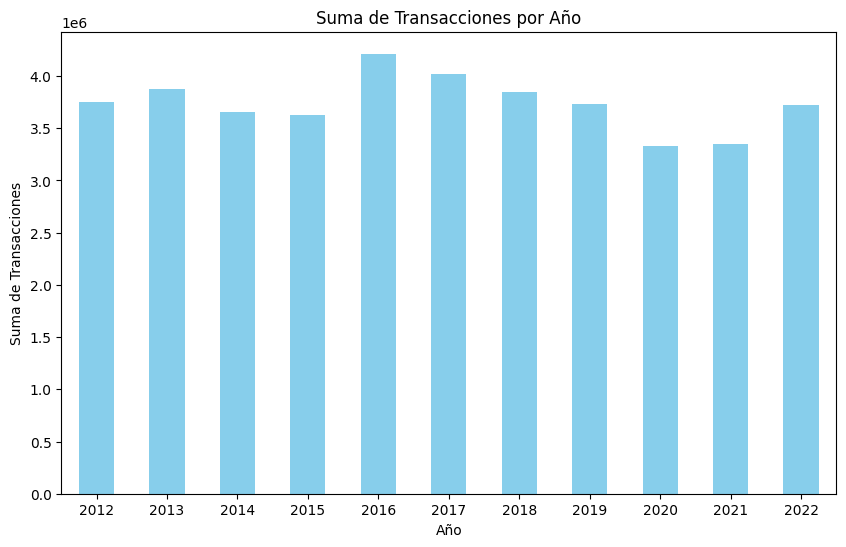

In [ ]:
plt.figure(figsize=(10, 6))
suma_por_año.plot(kind='bar', color='skyblue')
plt.xlabel('Año')
plt.ylabel('Suma de Transacciones')
plt.title('Suma de Transacciones por Año')
plt.xticks(rotation=0)
plt.show()

## MOBILE

In [ ]:
mobile = df[df['Forecast_Cd'] == 500]
mobile

,Forecast_Cd,Forecast_Name,fecha,mth,dia_sem,dia_sem_txt,cierre_tj,Cant_Trx,flag_tj_vto,flag_tv_vto,flag_tm_vto,flag_tj_cierre,flag_tv_cierre,flag_tm_cierre
5,500,MOBILE,2012-01-01,201201,1,DOM,0.0,644,NaN,NaN,NaN,NaN,NaN,NaN
15,500,MOBILE,2012-01-02,201201,2,LUN,0.0,1080,NaN,NaN,NaN,NaN,NaN,NaN
25,500,MOBILE,2012-01-03,201201,3,MAR,0.0,1737,NaN,NaN,NaN,NaN,NaN,NaN
35,500,MOBILE,2012-01-04,201201,4,MIE,0.0,2314,NaN,NaN,NaN,NaN,NaN,NaN
45,500,MOBILE,2012-01-05,201201,5,JUE,2.0,2291,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39754,500,MOBILE,2022-12-27,202212,3,MAR,NaN,427521,0.0,0.0,0.0,0.0,0.0,0.0
39763,500,MOBILE,2022-12-28,202212,4,MIE,NaN,536488,0.0,0.0,0.0,0.0,0.0,0.0
39772,500,MOBILE,2022-12-29,202212,5,JUE,NaN,423956,0.0,0.0,0.0,1.0,1.0,1.0
39781,500,MOBILE,2022-12-30,202212,6,VIE,NaN,676819,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
max_trx_mob= mobile.groupby('fecha')['Cant_Trx'].sum().idxmax()
max_trx_mob

Timestamp('2022-10-05 00:00:00')

In [ ]:
min_trx_mob= mobile.groupby('fecha')['Cant_Trx'].sum().idxmin()
min_trx_mob

Timestamp('2020-02-12 00:00:00')

In [ ]:
max_trx_day_mob = mobile[mobile['fecha'].dt.date == max_trx_mob.date()]
max_trx_day_mob

,Forecast_Cd,Forecast_Name,fecha,mth,dia_sem,dia_sem_txt,cierre_tj,Cant_Trx,flag_tj_vto,flag_tv_vto,flag_tm_vto,flag_tj_cierre,flag_tv_cierre,flag_tm_cierre
39007,500,MOBILE,2022-10-05,202210,4,MIE,NaN,1646684,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
min_trx_day_mob = mobile[mobile['fecha'].dt.date == min_trx_mob.date()]
min_trx_day_mob

,Forecast_Cd,Forecast_Name,fecha,mth,dia_sem,dia_sem_txt,cierre_tj,Cant_Trx,flag_tj_vto,flag_tv_vto,flag_tm_vto,flag_tj_cierre,flag_tv_cierre,flag_tm_cierre
29473,500,MOBILE,2020-02-12,202002,4,MIE,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0


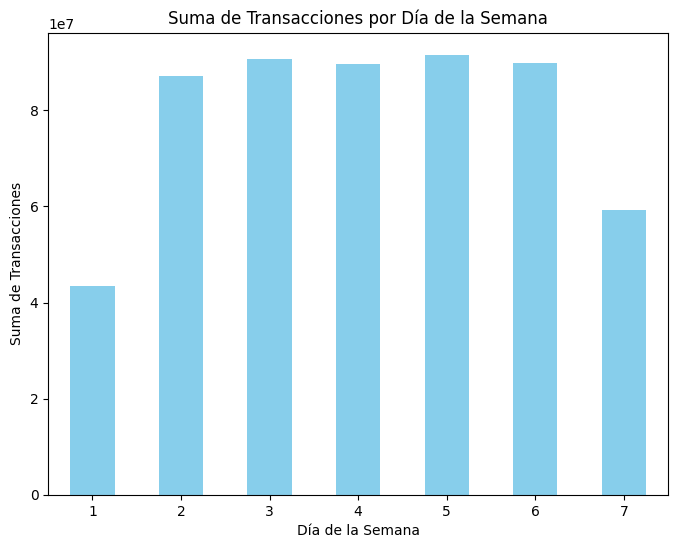

In [ ]:
#Suma por día de cantidad de transacciones
suma_por_dia_mobile = mobile.groupby('dia_sem')['Cant_Trx'].sum()

# Crear un gráfico de barras para visualizar la suma de transacciones por día de la semana
plt.figure(figsize=(8, 6))
suma_por_dia_mobile.plot(kind='bar', color='skyblue')
plt.xlabel('Día de la Semana')
plt.ylabel('Suma de Transacciones')
plt.title('Suma de Transacciones por Día de la Semana')
plt.xticks(rotation=0)  # Para rotar los nombres de los días si es necesario
plt.show()

In [ ]:
## mobile['fecha'] = pd.to_datetime(mobile['fecha'])

# Utilizar .loc para asignar el año a la nueva columna 'año'
mobile.loc[:, 'año'] = mobile['fecha'].dt.year

suma_por_año_mobile = mobile.groupby('año')['Cant_Trx'].sum()

C:\Users\anieto\AppData\Local\Temp\ipykernel_5072\2846829838.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mobile.loc[:, 'año'] = mobile['fecha'].dt.year


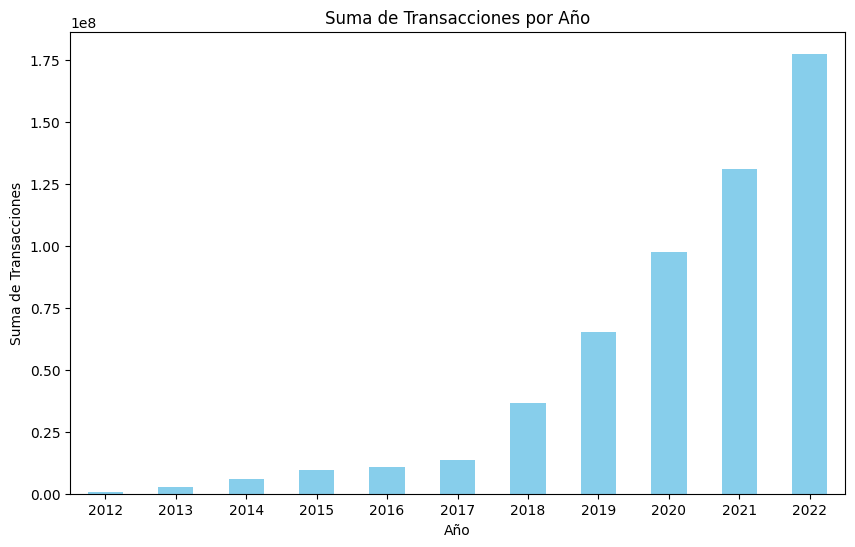

In [ ]:
plt.figure(figsize=(10, 6))
suma_por_año_mobile.plot(kind='bar', color='skyblue')
plt.xlabel('Año')
plt.ylabel('Suma de Transacciones')
plt.title('Suma de Transacciones por Año')
plt.xticks(rotation=0)
plt.show()

In [ ]:
#Suma por día en orden. 
#Indica que el viernes es el día con más transacciones, en segundo lugar el miércoles, tercer día es el martes, cuarto día es el jueves, quinto
# día es el sábado, sexto lugar es el domingo y en último lugar el lunes.
suma_por_dia_en_orden = suma_por_dia.sort_values(ascending=False)
suma_por_dia_en_orden

dia_sem
2    10863613
3     7971167
4     7795705
5     7308074
6     7174677
1           0
7           0
Name: Cant_Trx, dtype: int64

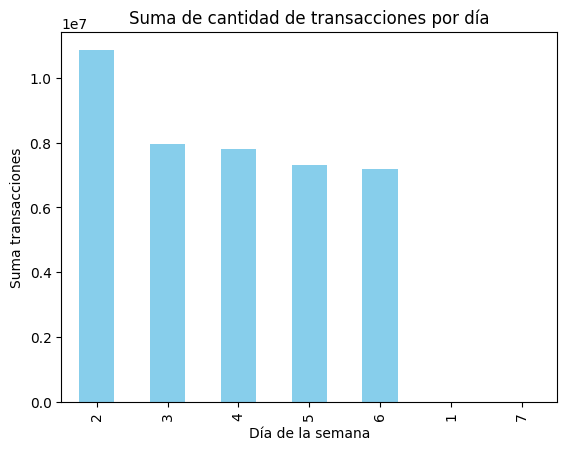

In [ ]:
suma_por_dia_en_orden = suma_por_dia.sort_values(ascending=False)
suma_por_dia_en_orden
suma_por_dia_en_orden.plot(kind='bar', color='skyblue')
plt.title('Suma de cantidad de transacciones por día')
plt.xlabel('Día de la semana')
plt.ylabel('Suma transacciones')
plt.show()

## PRE Y POST PANDEMIA

In [ ]:
antes_febrero_2020 = mobile_and_ivr_df[mobile_and_ivr_df['fecha'] < '2020-01-02']
despues_febrero_2020 = mobile_and_ivr_df[mobile_and_ivr_df['fecha'] >= '2020-01-02']

suma_antes_2020 = antes_febrero_2020['Cant_Trx'].sum()
suma_despues_2020 = despues_febrero_2020['Cant_Trx'].sum()

print(f"Suma de cantidad de transacciones antes del 01/02/2020: {suma_antes_2020}")
print(f"Suma de cantidad de transacciones después del 01/02/2020: {suma_despues_2020}")

Suma de cantidad de transacciones antes del 01/02/2020: 176753694
Suma de cantidad de transacciones después del 01/02/2020: 416165075


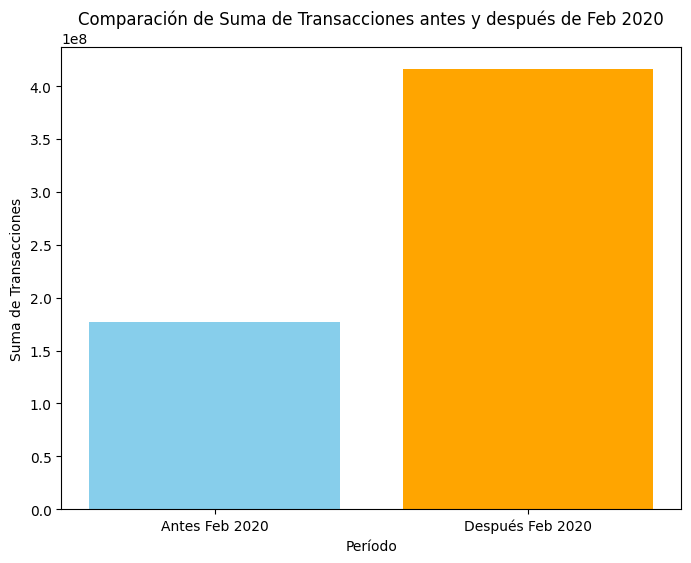

In [ ]:
# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(['Antes Feb 2020', 'Después Feb 2020'], [suma_antes_2020, suma_despues_2020], color=['skyblue', 'orange'])
plt.xlabel('Período')
plt.ylabel('Suma de Transacciones')
plt.title('Comparación de Suma de Transacciones antes y después de Feb 2020')
plt.show()

## PRE POST PANDEMIA POR CANAL

## MOBILE

In [ ]:
mobile_impacto_pandemia = df[df['Forecast_Cd'] == 500]

antes_febrero_2020_mobile = df[df['fecha'] < '2020-01-02']
despues_febrero_2020_mobile = df[df['fecha'] >= '2020-01-02']

suma_antes_2020_mobile = antes_febrero_2020_mobile['Cant_Trx'].sum()
suma_despues_2020_mobile = despues_febrero_2020_mobile['Cant_Trx'].sum()

print(f"Suma de cantidad de transacciones antes del 01/02/2020 en el canal Mobile: {suma_antes_2020_mobile}")
print(f"Suma de cantidad de transacciones después del 01/02/2020 en el canal Mobile: {suma_despues_2020_mobile}")


Suma de cantidad de transacciones antes del 01/02/2020 en el canal Mobile: 1961249663
Suma de cantidad de transacciones después del 01/02/2020 en el canal Mobile: 1401299432


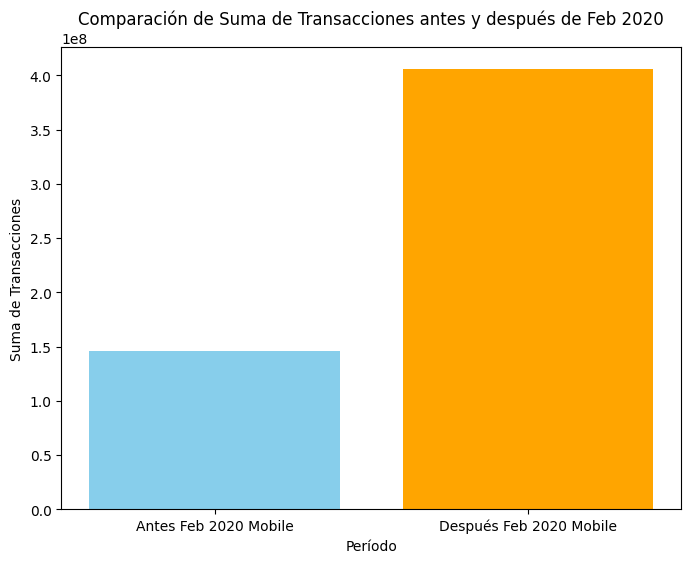

In [ ]:
# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(['Antes Feb 2020 Mobile', 'Después Feb 2020 Mobile'], [suma_antes_2020_mobile, suma_despues_2020_mobile], color=['skyblue', 'orange'])
plt.xlabel('Período')
plt.ylabel('Suma de Transacciones')
plt.title('Comparación de Suma de Transacciones antes y después de Feb 2020')
plt.show()

## IVR

In [ ]:
ivr_impacto_pandemia = df[df['Forecast_Cd'] == 202]

antes_febrero_2020_ivr = ivr_impacto_pandemia[df['fecha'] < '2020-01-02']
despues_febrero_2020_ivr = ivr_impacto_pandemia[df['fecha'] >= '2020-01-02']

suma_antes_2020_ivr = antes_febrero_2020_ivr['Cant_Trx'].sum()
suma_despues_2020_ivr = despues_febrero_2020_ivr['Cant_Trx'].sum()

print(f"Suma de cantidad de transacciones antes del 01/02/2020 en el canal Mobile: {suma_antes_2020_mobile}")
print(f"Suma de cantidad de transacciones después del 01/02/2020 en el canal Mobile: {suma_despues_2020_mobile}")


Suma de cantidad de transacciones antes del 01/02/2020 en el canal Mobile: 146042690
Suma de cantidad de transacciones después del 01/02/2020 en el canal Mobile: 405762843


C:\Users\anieto\AppData\Local\Temp\ipykernel_16396\795453110.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  antes_febrero_2020_ivr = ivr_impacto_pandemia[df['fecha'] < '2020-01-02']
C:\Users\anieto\AppData\Local\Temp\ipykernel_16396\795453110.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  despues_febrero_2020_ivr = ivr_impacto_pandemia[df['fecha'] >= '2020-01-02']


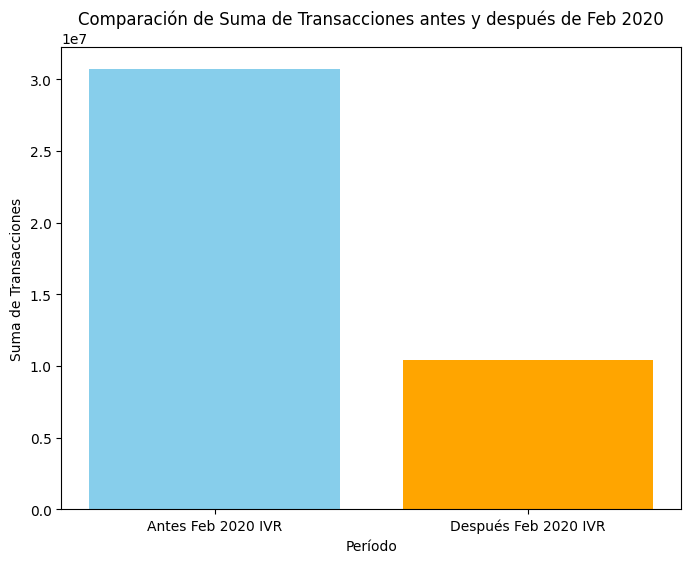

In [ ]:
# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(['Antes Feb 2020 IVR', 'Después Feb 2020 IVR'], [suma_antes_2020_ivr, suma_despues_2020_ivr], color=['skyblue', 'orange'])
plt.xlabel('Período')
plt.ylabel('Suma de Transacciones')
plt.title('Comparación de Suma de Transacciones antes y después de Feb 2020')
plt.show()

## Correlación incluyendo todos los canales

In [ ]:
df_corr = df.drop(['Forecast_Name', 'dia_sem_txt'], axis=1)

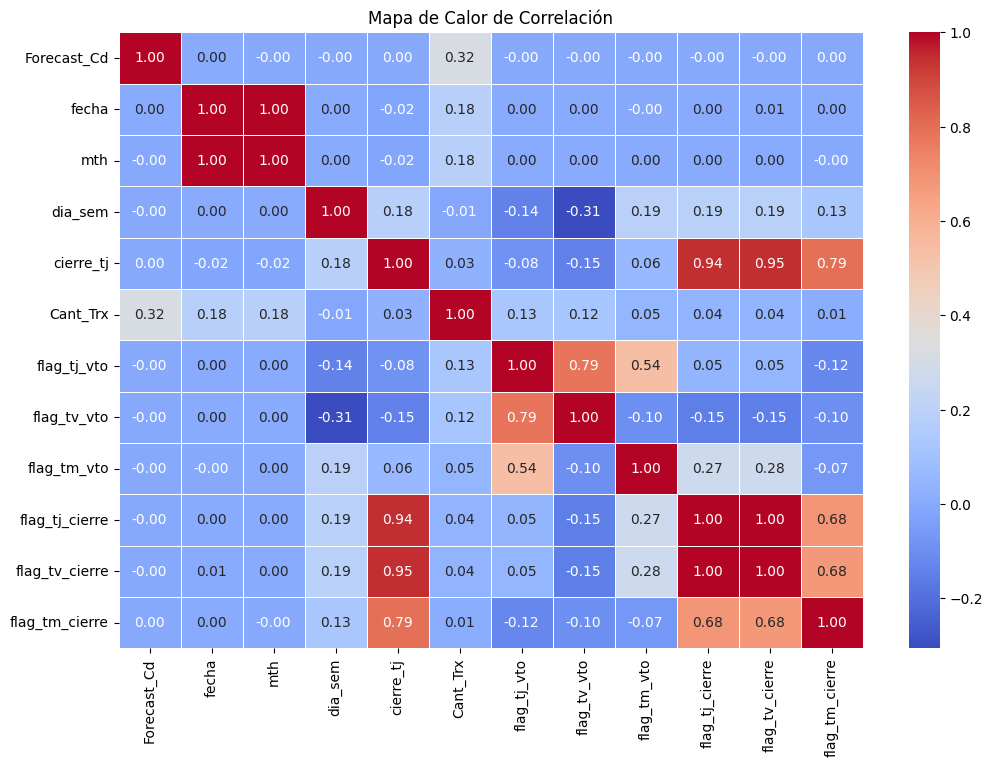

In [ ]:
# Calcular la matriz de correlación
matriz_correlacion = df_corr.corr()

# Crear un mapa de calor para visualizar la correlación
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de Correlación')
plt.show()

## Correlación con canales IVR y Mobile

In [ ]:
df_corr_ivr_mobile = mobile_and_ivr_df.drop(['Forecast_Name', 'dia_sem_txt'], axis=1)

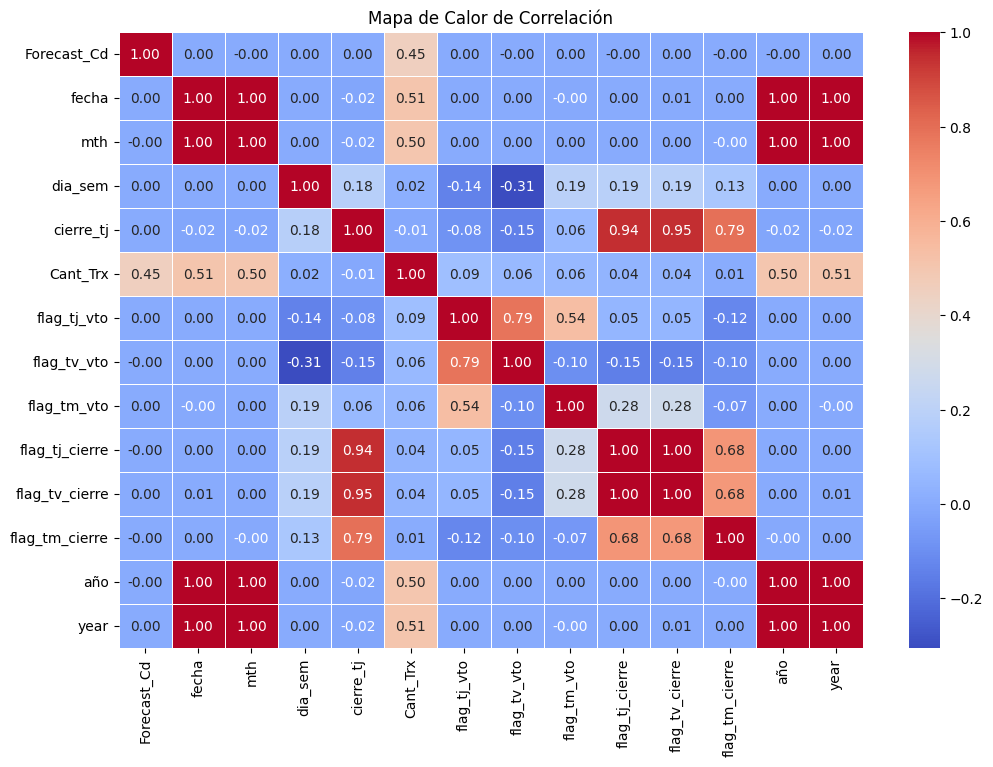

In [ ]:
# Calcular la matriz de correlación
matriz_correlacion_ivr_mobile = df_corr_ivr_mobile.corr()

# Crear un mapa de calor para visualizar la correlación
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion_ivr_mobile, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de Correlación')
plt.show()

## Correlación IVR

In [ ]:
ivr_corr = ivr.drop(['Forecast_Name', 'dia_sem_txt'], axis=1)

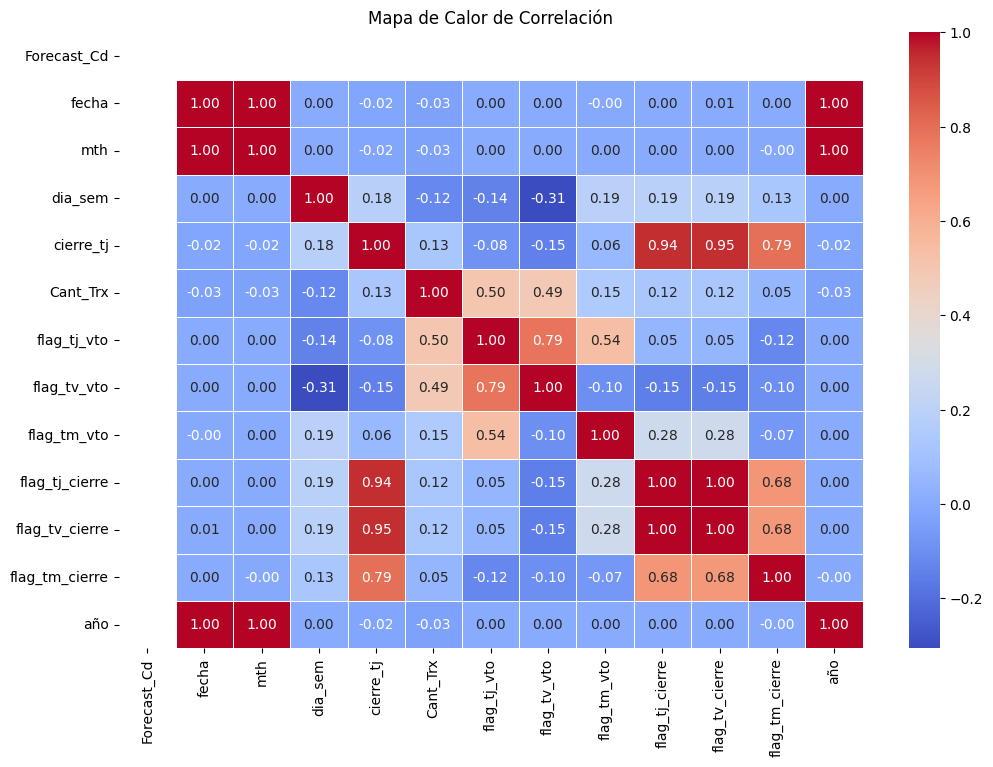

In [ ]:
# Calcular la matriz de correlación
matriz_correlacion_ivr = ivr_corr.corr()

# Crear un mapa de calor para visualizar la correlación
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion_ivr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de Correlación')
plt.show()

## Correlación mobile

In [ ]:
mobile_corr = mobile.drop(['Forecast_Name', 'dia_sem_txt'], axis=1)

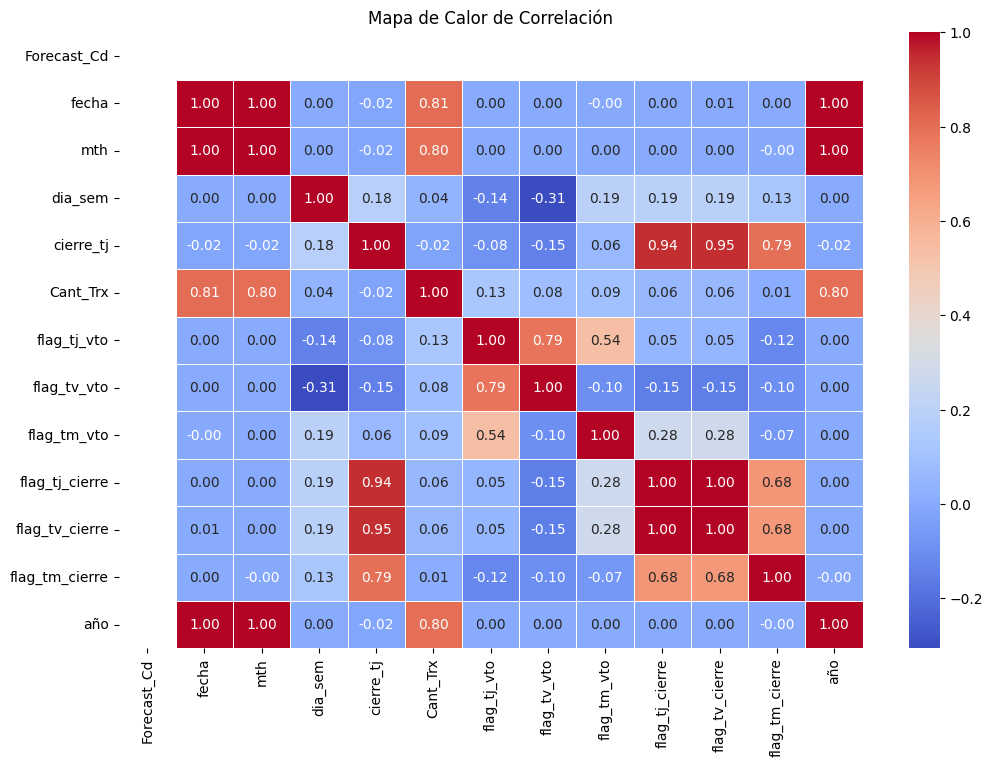

In [ ]:
# Calcular la matriz de correlación
matriz_correlacion_mobile = mobile_corr.corr()

# Crear un mapa de calor para visualizar la correlación
plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacion_mobile, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de Correlación')
plt.show()

## Conclusiones

Ambos canales en conjunto suman más transacciones para el año 2022.

En el canal IVR, el día de máximas transacciones previstas fue el 13-04-2020.
Y el día con menos transacciones fue el 01-01-2012.
Históricamente el día semanal que más transacciones suma es el día martes.
Seguido por miércoles, jueves, viernes y sábado. Con poca suma o nula de transacciones domingos y lunes.
Siendo el 2016 el año con más transacciones acumuladas para el canal IVR.
Baja la tendencia los siguientes años hasta el 2021 continua bajando,
y en 2022 se ve una alta en transacciones por IVR. Aunque no llega a acumular lo mismo que 2016.

En el canal Mobile, el día de máximas transacciones previstas fue el 05-10-2022.
Y el día con menos transacciones fue el 02-12-2022.
Históricamente el día que más transacciones suma es el día viernes. Seguido por miércoles, sábado, jueves, martes, domingo y lunes.
Siendo el 2022 el año con más transacciones acumuladas para el canal Mobile. Y la tendencia es de crecimiento desde 2012 hasta 2022.

Con respecto a la pandemia, (fecha que tomé en consideración fue primero de febrero 2020),
sumando ambos canales subieron la cantidad de transacciones. 
Pero IVR como canal decayó la cantidad de transacciones post pandemia.
